## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
from mlutils.features import *
from mlutils.plot import *

## Loading Data

In [3]:
%%time
# load just a quick sample and let pandas figure out types
df_sample = pd.read_csv('data/Train.csv', nrows=100)

CPU times: user 1.59 ms, sys: 4.54 ms, total: 6.14 ms
Wall time: 11.7 ms


In [4]:
display_all(df_sample.head(), transpose=True)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [5]:
df_sample.dtypes

SalesID                      int64
SalePrice                    int64
MachineID                    int64
ModelID                      int64
datasource                   int64
auctioneerID                 int64
YearMade                     int64
MachineHoursCurrentMeter     int64
UsageBand                   object
saledate                    object
fiModelDesc                 object
fiBaseModel                 object
fiSecondaryDesc             object
fiModelSeries               object
fiModelDescriptor           object
ProductSize                 object
fiProductClassDesc          object
state                       object
ProductGroup                object
ProductGroupDesc            object
Drive_System                object
Enclosure                   object
Forks                       object
Pad_Type                    object
Ride_Control                object
Stick                       object
Transmission                object
Turbocharged                object
Blade_Extension     

In [6]:
# seems date was not correctly interpreted. We can convert it here
df_sample.saledate = pd.to_datetime(df_sample.saledate)

In [7]:
%%time
# or let's read the entire dataset specifying the parse_dates parameter
df_raw = pd.read_csv('data/Train.csv', parse_dates=['saledate'], low_memory=False)

CPU times: user 28.4 s, sys: 212 ms, total: 28.6 s
Wall time: 27.8 s


## Looking at Dataframe size

In [8]:
df_raw.shape

(401125, 53)

In [9]:
display_mem_usage(df_raw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

## Preprocessing

In [10]:
# In this case the metric is RMSLE (root mean squared log error).
# Therefore, we turn SalePrice (label) to log and just use RMSE as usual
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Using datetime values

In [11]:
add_datepart(df_raw, 'saledate')
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [12]:
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

### Creating categorical columns

In [13]:
# now we need to turn all strings into categorical columns
create_categories(df_raw)

In [14]:
# here's an example
df_raw.UsageBand.head()

0       Low
1       Low
2      High
3      High
4    Medium
Name: UsageBand, dtype: category
Categories (3, object): [High < Low < Medium]

In [15]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [16]:
# -1 mean missing value
df_raw.UsageBand.cat.codes.value_counts()

-1    331486
 2     33985
 1     23620
 0     12034
dtype: int64

In [17]:
# we can also sort the order if we like
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [18]:
df_raw.UsageBand.cat.codes.head()

0    2
1    2
2    0
3    0
4    1
dtype: int8

### Saving pre-processing in feather format

In [19]:
os.makedirs('tmp', exist_ok=True)
%time df_raw.to_feather('tmp/bulldozers-raw')

CPU times: user 314 ms, sys: 69.6 ms, total: 384 ms
Wall time: 279 ms


In [20]:
import feather
%time df_raw = feather.read_dataframe('tmp/bulldozers-raw')

CPU times: user 132 ms, sys: 9.12 ms, total: 141 ms
Wall time: 35 ms


In [21]:
!ls -lh tmp

total 67M
-rw-r--r-- 1 quick quick 67M nov 29 22:00 bulldozers-raw
-rw-r--r-- 1 quick quick 707 nov 29 19:03 keep_cols.npy
-rw-r--r-- 1 quick quick 667 nov 29 19:11 subs_cols.npy


In [22]:
!ls -lh data

total 112M
drwxr-xr-x 4 quick quick 4,0K jun 26  2011 aclImdb
drwxr-xr-x 3 quick quick 4,0K nov 29 16:17 mnist
-rw-r--r-- 1 quick quick 112M jan 24  2013 Train.csv


In [23]:
# notice how we reduced the mem usage from 791 MB to just 64 MB
display_mem_usage(df_raw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 65 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null category
fiModelDesc                 401125 non-null category
fiBaseModel                 401125 non-null category
fiSecondaryDesc             263934 non-null category
fiModelSeries               56908 non-null category
fiModelDescriptor           71919 non-null category
ProductSize                 190350 non-null category
fiProductClassDesc          401125 non-null category
state                       401125 non-null category
ProductGr

### Handling missing values

In [24]:
# let's check if we still have missing values
detect_missing(df_raw, percentages=True)

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
Scarifier                   0.937102
Steering_Controls           0.827064
Stick                       0.802720
Stick_Length                0.752651
T

In [25]:
# simple prep
df, y, nas = process_dataframe(df_raw, 'SalePrice')

In [26]:
detect_missing(df, percentages=True)

Series([], dtype: float64)

## Train a RandomForest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from mlutils.models.regression import *
m = RandomForestRegressor(n_jobs=-1)

In [28]:
%%time
train_regressor(m, df, y)

  R2 (Training): 0.9830068982170717
RMSE (Training): 0.0081755295207057
CPU times: user 1min 1s, sys: 672 ms, total: 1min 1s
Wall time: 9.64 s


In [29]:
%%time
# obviously the RMSE can't be trusted so let's look at the cross validation scores.
train_regressor_cv(m, df, y)

R2 Score on training set:  0.9831426824627001
Training RMSE score using 5-fold crossvalidation:  0.316985567372999
CPU times: user 4min 35s, sys: 1.27 s, total: 4min 36s
Wall time: 37.4 s


### Create Validation set

In [30]:
# this took a while, so let's do a simpler approach to iterate quickly
n_val = 12000
n_train = len(df) - n_val
X_train, X_val = split_vals(df, n_train)
y_train, y_val = split_vals(y, n_train)

In [31]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((389125, 66), (12000, 66), (389125,), (12000,))

In [32]:
# let's repeat training on the train set
%time train_regressor(m, X_train, y_train)

  R2 (Training): 0.983020235044062
RMSE (Training): 0.008124503836573736
CPU times: user 57 s, sys: 368 ms, total: 57.4 s
Wall time: 8.66 s


In [33]:
# check scores on our validation set
predict_and_evaluate_regressor(m, X_val, y_val)

             R2: 0.89127
           RMSE: 0.24675


(array([9.1510534 , 9.09697463, 9.34653509, ..., 9.45034251, 9.26082063,
        9.26082063]), 0.8912705607850011, 0.24674569661328644)

That's pretty good: 0.25 would be enough to get us a very good score on Kaggle. However, looking at the R2 scores of train vs validation means we are overfitting 

## Tuning our tree

### Iterating quickly - creating a small subset of data

In [34]:
# get just a subset of data, create new training set from it
df_trn, y_trn, nas = process_dataframe(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [35]:
m = RandomForestRegressor(n_jobs=-1)
%time train_regressor(m, X_train, y_train)

  R2 (Training): 0.9728887730876546
RMSE (Training): 0.012478957666127378
CPU times: user 2.95 s, sys: 24.1 ms, total: 2.97 s
Wall time: 689 ms


In [36]:
predict_and_evaluate_regressor(m, X_val, y_val)

             R2: 0.76080
           RMSE: 0.36598


(array([9.21834401, 9.49550684, 9.22220858, ..., 9.73429339, 9.61267951,
        9.61267951]), 0.760796086804029, 0.3659823597801563)

### Using a single shallow tree to visualize features

In [37]:
# we don't allow the tree to grow much through the max_depth parameter
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
train_regressor(m, X_train, y_train)
predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.4167342370341165
RMSE (Training): 0.26846991424199934
             R2: 0.39081
           RMSE: 0.58405


(array([10.52888894, 10.52888894,  9.93532793, ..., 10.52888894,
        10.52888894, 10.52888894]), 0.39081210968370195, 0.5840521726665779)

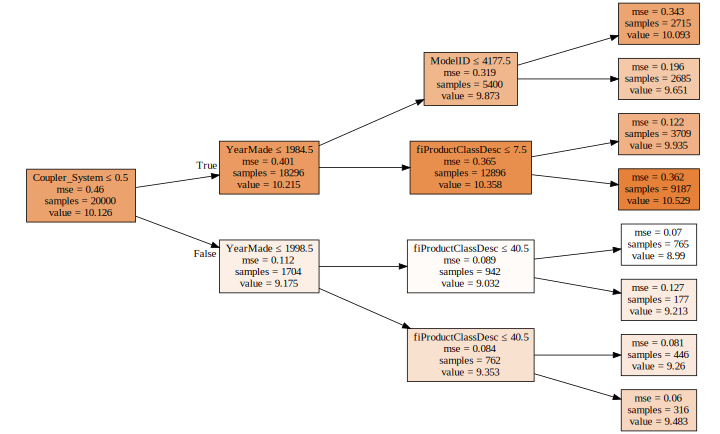

In [38]:
from mlutils.models.trees import draw_tree
draw_tree(m.estimators_[0], df_trn, precision=3)

### Allowing the tree to grow unchecked

In [39]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
train_regressor(m, X_train, y_train)
_ = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 1.0
RMSE (Training): 5.206481974458678e-33
             R2: 0.58913
           RMSE: 0.47965


The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results.

### How many estimators do we need?

In [40]:
m = RandomForestRegressor(n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9735159103910492
RMSE (Training): 0.012190294232148074
             R2: 0.77057
           RMSE: 0.35842


In [41]:
# grabbing predictions for each tree in the forest
preds = np.stack([t.predict(X_val) for t in m.estimators_])

print("All predictions:\n", preds[:,0])
print()
print("  Mean prediction:", np.mean(preds[:,0]))
print("Forest prediction:", m_preds[0])
print("     Actual value:", y_val[0])


All predictions:
 [9.54681261 9.87816974 8.98719682 8.96187901 8.98719682 9.47270464
 9.35010231 8.96187901 9.54681261 9.87816974]

  Mean prediction: 9.35709233237728
Forest prediction: [9.35709233 9.37197399 9.21831467 ... 9.67929894 9.61813563 9.61813563]
     Actual value: 9.104979856318357


Notice the forest prediction is the same as the mean of all estimator's predictions

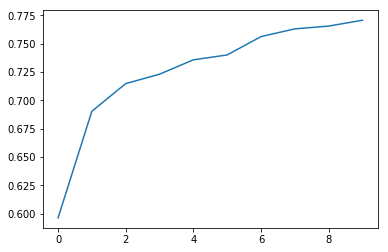

In [44]:
from mlutils.models.trees import *
analyze_estimators_growth_r2(m, X_val, y_val)

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [45]:
# the current model used 10 trees (default)
len(m.estimators_)

10

In [46]:
# try 20 trees
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9776318507335785
RMSE (Training): 0.010295778522593776
             R2: 0.78911
           RMSE: 0.34364


In [47]:
# try 40 trees
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9796231750860894
RMSE (Training): 0.009379196902187761
             R2: 0.78396
           RMSE: 0.34781


In [48]:
# try 80 trees
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9808912926515309
RMSE (Training): 0.008795498294006767
             R2: 0.78255
           RMSE: 0.34895


Notice how RMSE and R2 seem to improve very slowly

### Are we overfitting?

In [49]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.980958362229282
RMSE (Training): 0.008764627008684698
      OOB Score: 0.8606622015269874
             R2: 0.78840
           RMSE: 0.34422


As the OOB_Score is higher than R2 score but lower than training set R2, this means that we are both overfitting and also the validation set has some uniqueness to it

### Let's combat overfitting - subsampling

In [50]:
# go back to the full dataset
df_trn, y_trn, nas = process_dataframe(df_raw, 'SalePrice')
X_train, X_va = split_vals(df_trn, n_train)
y_train, y_val = split_vals(y_trn, n_train)

In [51]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((389125, 66), (12000, 66), (389125,), (12000,))

In [52]:
# Changes Scikit learn's random forests to give each tree a random sample of n random rows
from mlutils.models.trees import set_rf_samples, reset_rf_samples, dectree_max_depth

set_rf_samples(20000)

In [53]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.8788506621252845
RMSE (Training): 0.057967719984090824
      OOB Score: 0.8662771904232759
             R2: 0.86032
           RMSE: 0.27967


Because each tree is only seeing a fraction of the data, increasing the number of trees might be useful here

In [54]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.8945623861382344
RMSE (Training): 0.05044995031215211
             R2: 0.87855
           RMSE: 0.26078


### Let's combat overfitting - tree parameters

In [55]:
# go back to full tree training
reset_rf_samples()

In [56]:
# establish baseline
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9871633770508687
RMSE (Training): 0.006142086929324454
      OOB Score: 0.908425332718382
             R2: 0.89863
           RMSE: 0.23825


In [57]:
# let's see how deep the trees are
t=m.estimators_[0].tree_
dectree_max_depth(t)

50

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [58]:
# adjusting min_samples_leaf
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9587608674622056
RMSE (Training): 0.019732163041698256
      OOB Score: 0.9074449281819369
             R2: 0.90235
           RMSE: 0.23384


In [59]:
# let's see how deep the trees are now
t=m.estimators_[0].tree_
dectree_max_depth(t)

38

In [60]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9723002736502898
RMSE (Training): 0.01325380731619383
      OOB Score: 0.9084275819788536
             R2: 0.90183
           RMSE: 0.23445


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

In [61]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9702126299923223
RMSE (Training): 0.014252706238091141
      OOB Score: 0.9113342408756371
             R2: 0.90673
           RMSE: 0.22853
